In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
file_1 = pd.read_csv('resources/demographic.csv')
file_2 = pd.read_csv('resources/diet.csv')
file_3 = pd.read_csv('resources/examination.csv')
file_4 = pd.read_csv('resources/labs.csv')
file_5 = pd.read_csv('resources/medications.csv', encoding = "ISO-8859-1")
file_6 = pd.read_csv('resources/questionnaire.csv')

In [3]:
df_1 = pd.DataFrame(file_1)
df_2 = pd.DataFrame(file_2)
df_3 = pd.DataFrame(file_3)
df_4 = pd.DataFrame(file_4)
df_5 = pd.DataFrame(file_5)
df_6 = pd.DataFrame(file_6)

dataframes = [df_1,df_2,df_3,df_4,df_5,df_6]

In [4]:
merged=reduce(lambda left,right: pd.merge(left, right, on='SEQN', how='inner'), dataframes)
merged.dropna(how='all', axis=1)
merged.dropna(how='all', axis=0)
print('columns: ' + str(len(merged.columns.tolist())))
print('rows: ' + str(len(merged.index)))

columns: 1824
rows: 19580


In [5]:
df_clean = merged.loc[:,['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMDEDUC3','DMDEDUC2','INDHHIN2',\
                         'BPXSY2','BPXDI2','BMXWAIST','MGDCGSZ','BMXBMI','BMXARMC','BMDBMIC','BPXPLS','LBXGH']]
#Combining children and adult education
df_clean['DMDEDUC3'].fillna(0, inplace=True)
df_clean['DMDEDUC2'].fillna(0, inplace=True)
df_clean['DMDEDUC'] = df_clean['DMDEDUC2'] + df_clean['DMDEDUC3']
df_clean = df_clean.drop(['DMDEDUC3'], axis=1).drop(['DMDEDUC2'], axis=1)

#combining children and adult BMI
df_clean['BMXBMI'].fillna(0, inplace=True)
df_clean['BMDBMIC'].fillna(0, inplace=True)
df_clean['bmi'] = df_clean['BMXBMI'] + df_clean['BMDBMIC']
df_clean = df_clean.drop(['BMXBMI'], axis=1).drop(['BMDBMIC'], axis=1)

df_clean = df_clean.rename(columns ={
    'SEQN': 'seqn',
    'RIAGENDR': 'gender',
    'RIDAGEYR': 'age',
    'RIDRETH3': 'ethnicity',
    'DMDEDUC': 'education',
    'INDHHIN2': 'household_income',
    'BMXWAIST': 'waist_circumference',
    'MGDCGSZ': 'grip',
    'bmi': 'bmi',
    'BMXARMC': 'arm_circumference',
    'BPXPLS': 'pulse_60s',
    'BPXSY2': 'systolic',
    'BPXDI2': 'diastolic',
    'LBXGH': 'glycohemoglobin'
})
df_clean.describe()

,seqn,gender,age,ethnicity,household_income,systolic,diastolic,waist_circumference,grip,arm_circumference,pulse_60s,glycohemoglobin,education,bmi
count,19580.000000,19580.000000,19580.000000,19580.000000,19362.000000,16367.000000,16367.000000,17448.000000,16075.000000,18328.000000,16748.000000,15752.000000,19580.000000,19580.000000
mean,78544.159704,1.534627,45.443565,3.260572,10.247237,123.554469,66.153235,96.306345,61.888734,30.929801,73.614163,5.986091,3.575128,27.392942
std,2935.456571,0.498812,25.559836,1.447386,13.376386,19.575751,15.395316,22.684470,23.086835,7.546291,12.598325,1.238664,2.919249,10.336352
min,73557.000000,1.000000,0.000000,1.000000,1.000000,66.000000,0.000000,40.200000,8.000000,10.400000,40.000000,3.500000,0.000000,0.000000
25%,75978.000000,1.000000,20.000000,3.000000,5.000000,110.000000,58.000000,82.400000,46.000000,26.800000,64.000000,5.300000,2.000000,22.300000
50%,78503.000000,2.000000,52.000000,3.000000,7.000000,120.000000,68.000000,97.500000,59.000000,31.600000,72.000000,5.600000,4.000000,27.300000
75%,81063.000000,2.000000,67.000000,4.000000,14.000000,134.000000,76.000000,110.500000,77.200000,35.700000,82.000000,6.200000,5.000000,32.900000
max,83731.000000,2.000000,80.000000,7.000000,99.000000,230.000000,116.000000,177.900000,162.800000,59.400000,180.000000,17.500000,99.000000,82.900000


In [6]:
# # sklearn.feature_selection.f_classif
# from sklearn.feature_selection import VarianceThreshold
# fs = VarianceThreshold(threshold=(.8 * (1 - .8)))
# fs.fit_transform(df_clean)
df_clean.head(n=20)

,seqn,gender,age,ethnicity,household_income,systolic,diastolic,waist_circumference,grip,arm_circumference,pulse_60s,glycohemoglobin,education,bmi
0,73557,1,69,4,4.0,114.0,76.0,100.0,55.2,35.3,86.0,13.9,3.0,26.7
1,73557,1,69,4,4.0,114.0,76.0,100.0,55.2,35.3,86.0,13.9,3.0,26.7
2,73558,1,54,3,7.0,160.0,80.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6
3,73558,1,54,3,7.0,160.0,80.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6
4,73558,1,54,3,7.0,160.0,80.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6
5,73558,1,54,3,7.0,160.0,80.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6
6,73559,1,72,3,10.0,140.0,76.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9
7,73559,1,72,3,10.0,140.0,76.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9
8,73559,1,72,3,10.0,140.0,76.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9
9,73559,1,72,3,10.0,140.0,76.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9


In [7]:
# defining diabetes

conditions = [
    (df_clean['glycohemoglobin'] < 5.7),
    (df_clean['glycohemoglobin'] >= 5.7) & (df_clean['glycohemoglobin']<=6.4),
    (df_clean['glycohemoglobin']>6.4)
]

diagnosis = [0,1,2]

df_clean['diabetes'] = np.select(conditions, diagnosis)

# changing gender to 1 = male 0 = female
df_clean['gender'] = df_clean['gender'].apply(lambda x: x if x==1 else 0)
# replacing BMI = 0 with median
df_clean['bmi'] = df_clean['bmi'].apply(lambda x: df_clean['bmi'].median() if x==0 else x)

# Replacing all other nulls with median values 
df_clean['household_income'] = df_clean['household_income'].fillna(df_clean['household_income'].median())
df_clean['waist_circumference'] = df_clean['waist_circumference'].fillna(df_clean['waist_circumference'].median())
df_clean['grip'] = df_clean['grip'].fillna(df_clean['grip'].median())
df_clean['glycohemoglobin'] = df_clean['glycohemoglobin'].fillna(df_clean['glycohemoglobin'].median())
df_clean['education'] = df_clean['education'].fillna(df_clean['education'].median())
df_clean['pulse_60s'] = df_clean['pulse_60s'].fillna(df_clean['pulse_60s'].median())
df_clean['systolic'] = df_clean['systolic'].fillna(df_clean['systolic'].median())
df_clean['diastolic'] = df_clean['systolic'].fillna(df_clean['systolic'].median())
df_clean['arm_circumference'] = df_clean['arm_circumference'].fillna(df_clean['arm_circumference'].median())

df_clean.head(n=20)

,seqn,gender,age,ethnicity,household_income,systolic,diastolic,waist_circumference,grip,arm_circumference,pulse_60s,glycohemoglobin,education,bmi,diabetes
0,73557,1,69,4,4.0,114.0,114.0,100.0,55.2,35.3,86.0,13.9,3.0,26.7,2
1,73557,1,69,4,4.0,114.0,114.0,100.0,55.2,35.3,86.0,13.9,3.0,26.7,2
2,73558,1,54,3,7.0,160.0,160.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6,2
3,73558,1,54,3,7.0,160.0,160.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6,2
4,73558,1,54,3,7.0,160.0,160.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6,2
5,73558,1,54,3,7.0,160.0,160.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6,2
6,73559,1,72,3,10.0,140.0,140.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9,2
7,73559,1,72,3,10.0,140.0,140.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9,2
8,73559,1,72,3,10.0,140.0,140.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9,2
9,73559,1,72,3,10.0,140.0,140.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9,2


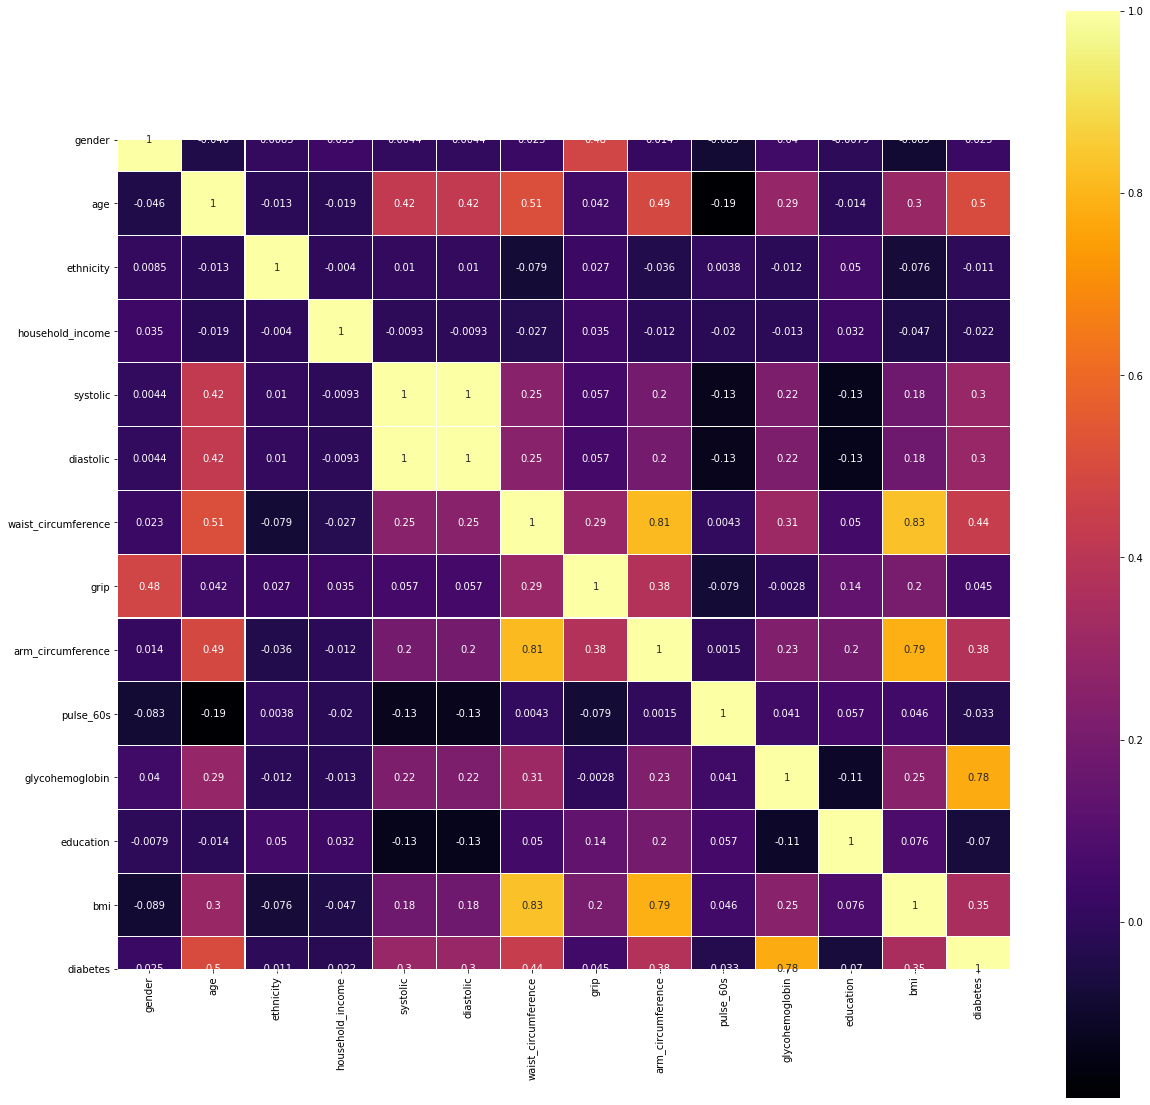

In [8]:
import seaborn as sns
cm = plt.cm.inferno
plt.figure(figsize= (20,20))
sns.heatmap(df_clean.astype(float).drop(axis=1, labels='seqn').corr(), linewidths= 0.1, vmax=1, square=True, cmap=cm, annot=True)

/anaconda3/envs/cool/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/cool/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/cool/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


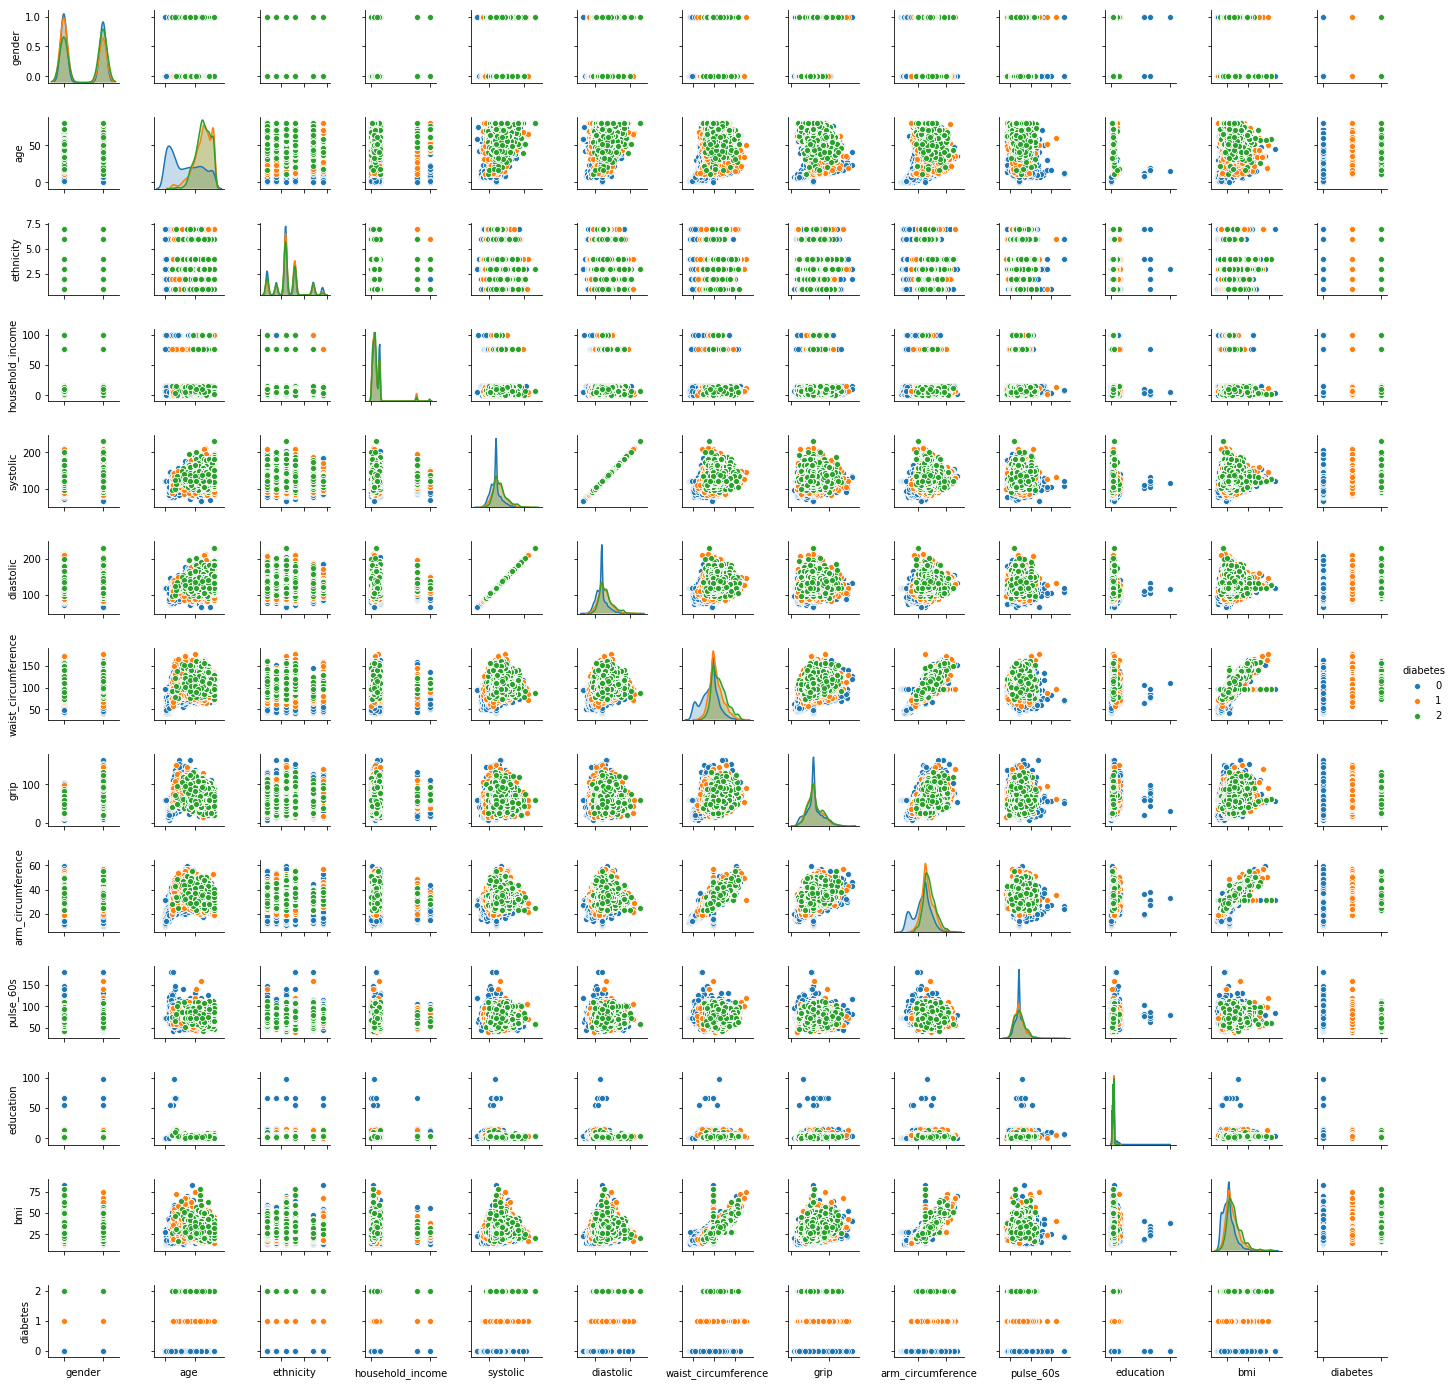

In [50]:
show = sns.pairplot(df_clean.drop(['seqn', 'glycohemoglobin'], axis=1), hue='diabetes', size=1.5, diag_kind='kde')
show.set(xticklabels=[])

In [19]:
X = df_clean.drop('seqn', axis=1).drop('glycohemoglobin', axis=1).iloc[:,0:11].values
y = df_clean.drop('seqn', axis=1).drop('glycohemoglobin', axis=1).iloc[:,12].values

In [20]:
X.shape

(19580, 11)

In [44]:
print(f"number of non-diabetics:  {y.tolist().count(0)}")
print(f"number of pre-diabetics:  {y.tolist().count(1)}")
print(f"number of diabetics:  {y.tolist().count(2)}")

number of non-diabetics:  11841
number of pre-diabetics:  4644
number of diabetics:  3095


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2, leaf_size=50000)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=50000, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [104]:
y_pred = classifier.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[   3,   54, 2330],
       [   0,   31,  866],
       [   0,   10,  622]])